In [1]:
import bagpy
from bagpy import bagreader
import math
import statistics
from math import radians, cos, sin, asin, sqrt, pi
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#extract csv from bag files
def data_csv(b):

    csvfiles = []
    for t in b.topics:
        data = b.message_by_topic(t)
        csvfiles.append(data)

    print(csvfiles[0])
    data = pd.read_csv(csvfiles[0])
    return data

In [3]:
b = bagreader("/home/krishna/LAB2/src/gnss_driver/data/occluded_stationary.bag")
csv_data = data_csv(b)

[INFO]  Data folder /home/krishna/LAB2/src/gnss_driver/data/occluded_stationary already exists. Not creating.
/home/krishna/LAB2/src/gnss_driver/data/occluded_stationary/gps.csv


In [4]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/gps,gnss_driver/gps_msg,542,0.999977


In [5]:
df_gps = pd.read_csv("/home/krishna/LAB2/src/gnss_driver/data/occluded_stationary/gps.csv")

In [6]:
df_gps

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,HDOP,Fix_quality,UTM_easting,UTM_northing,UTC,Zone,Letter
0,1.677020e+09,19,230101,0,GPS1_Frame,42.308193,-71.105942,18.700001,0.88,5,326431.03125,4686143.0,230101.0,19,T
1,1.677020e+09,20,230102,0,GPS1_Frame,42.308193,-71.105942,18.900000,0.88,5,326431.28125,4686143.0,230102.0,19,T
2,1.677020e+09,21,230103,0,GPS1_Frame,42.308189,-71.105942,19.100000,0.88,5,326431.46875,4686143.0,230103.0,19,T
3,1.677020e+09,22,230104,0,GPS1_Frame,42.308189,-71.105934,19.400000,0.88,5,326431.68750,4686142.5,230104.0,19,T
4,1.677020e+09,23,230105,0,GPS1_Frame,42.308189,-71.105934,19.600000,0.88,5,326431.90625,4686142.5,230105.0,19,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,1.677021e+09,556,230958,0,GPS1_Frame,42.308186,-71.105911,21.500000,0.75,5,326434.03125,4686142.0,230958.0,19,T
538,1.677021e+09,557,230959,0,GPS1_Frame,42.308186,-71.105911,21.500000,0.75,5,326434.06250,4686142.0,230959.0,19,T
539,1.677021e+09,558,231000,0,GPS1_Frame,42.308186,-71.105911,21.600000,0.75,5,326434.06250,4686142.0,231000.0,19,T
540,1.677021e+09,559,231001,0,GPS1_Frame,42.308186,-71.105911,21.600000,0.75,5,326434.06250,4686142.0,231001.0,19,T


In [7]:
df_gps['Fix_quality'].value_counts()

5    542
Name: Fix_quality, dtype: int64

In [8]:
#median data

df_gps['UTM_easting_median'] = df_gps['UTM_easting'] - df_gps['UTM_easting'].median(axis=0)
df_gps['UTM_northing_median'] = df_gps['UTM_northing'] - df_gps['UTM_northing'].median(axis=0)

In [9]:
df_gps['UTM_easting'].median(axis=0), df_gps['UTM_northing'].median(axis=0)

(326434.375, 4686141.5)

In [10]:
df_gps['UTM_easting_median'], df_gps['UTM_northing_median'] 

(0     -3.34375
 1     -3.09375
 2     -2.90625
 3     -2.68750
 4     -2.46875
         ...   
 537   -0.34375
 538   -0.31250
 539   -0.31250
 540   -0.31250
 541   -0.31250
 Name: UTM_easting_median, Length: 542, dtype: float64,
 0      1.5
 1      1.5
 2      1.5
 3      1.0
 4      1.0
       ... 
 537    0.5
 538    0.5
 539    0.5
 540    0.5
 541    0.5
 Name: UTM_northing_median, Length: 542, dtype: float64)

In [11]:
cep_radius = 0.56*(df_gps['UTM_easting_median'].std() + 0.62*df_gps['UTM_northing_median'].std())
cep_radius

0.4785286092135245

In [12]:
drms_2 = 2* (np.sqrt(df_gps['UTM_easting_median'].var() + df_gps['UTM_northing_median'].var()))
drms_2

1.4636960182224508

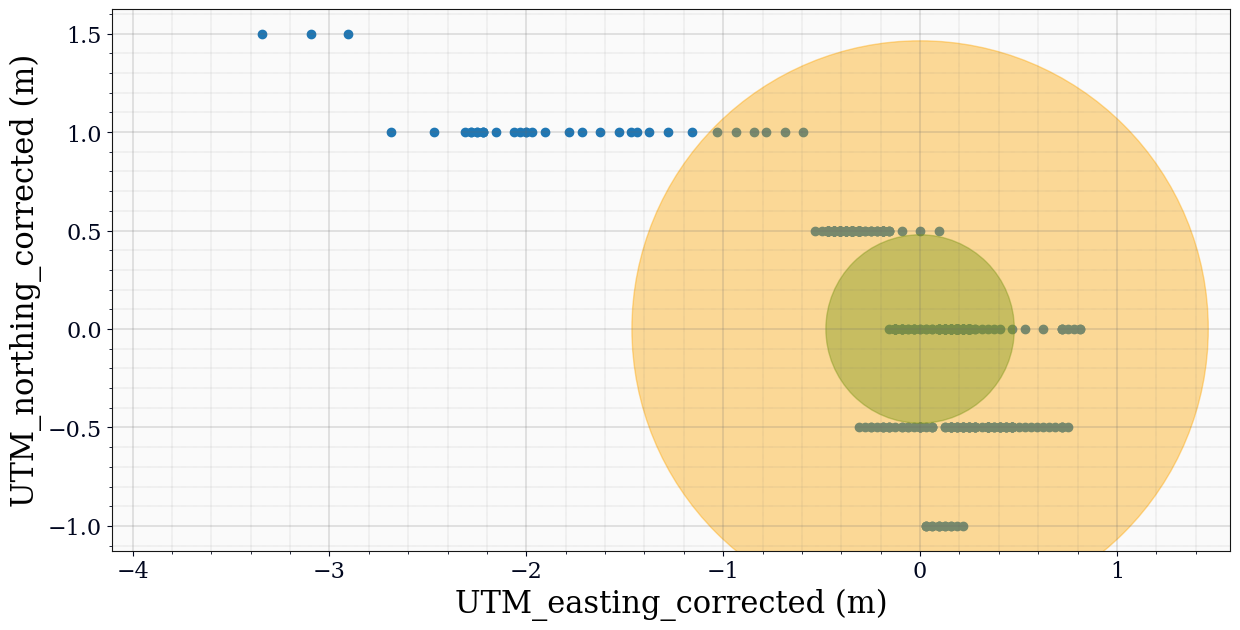

In [13]:
#corrected - the median of the each data in easting and northing was subtracted 
#from the  easting and northing datapoints respectively. 
fig, ax = bagpy.create_fig(1)
ax[0].grid(True)
ax[0].axis('equal')
ax[0].scatter(x='UTM_easting_median', y='UTM_northing_median', data=df_gps)
plt.xlabel("UTM_easting_corrected (m)")
plt.ylabel("UTM_northing_corrected (m)")
cir_CEP = plt.Circle((0,0),cep_radius,color='forestgreen',alpha=0.4)
cir_drms = plt.Circle((0,0),drms_2,color='orange',alpha=0.4)
ax[0].add_artist(cir_CEP)
ax[0].add_artist(cir_drms)
#plt.savefig('/home/krishna/LAB2/src/gnss_driver/analysis/open_analysis/plots_occluded_stationary/northing_vs_easting_occluded_stationary.png')
plt.show()

In [14]:
#percentage of points near the median
#considering that the median here (0,0)
df_gps['dist_euclidean'] = np.sqrt( (df_gps['UTM_easting_median'])**2 + (df_gps['UTM_northing_median'])**2)

df_gps['dist_euclidean'] 

0      3.664787
1      3.438210
2      3.270518
3      2.867517
4      2.663593
         ...   
537    0.606765
538    0.589624
539    0.589624
540    0.589624
541    0.589624
Name: dist_euclidean, Length: 542, dtype: float64

In [15]:
df_gps['dist_euclidean'].mean(), df_gps['dist_euclidean'].var()

(0.563791362202839, 0.2511006970633331)

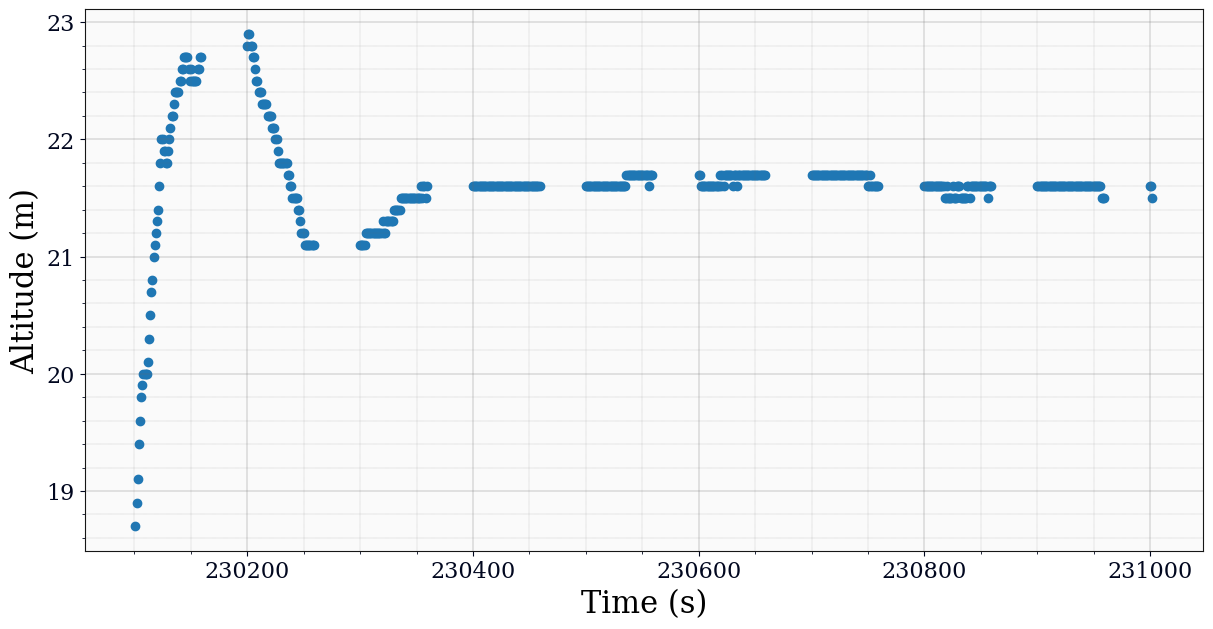

In [16]:
fig, ax = bagpy.create_fig(1)
ax[0].scatter(x='Header.stamp.secs', y='Altitude', data=df_gps)
plt.xlabel("Time (s)")

plt.ylabel("Altitude (m)")
plt.show()

In [17]:
#mean, variance

[ df_gps['Altitude'].mean(), df_gps['Altitude'].var() ]

[21.6177125135471, 0.2007208235984192]

Mean: 119.42792817889777
Standard deviation: 0.5218250462185493


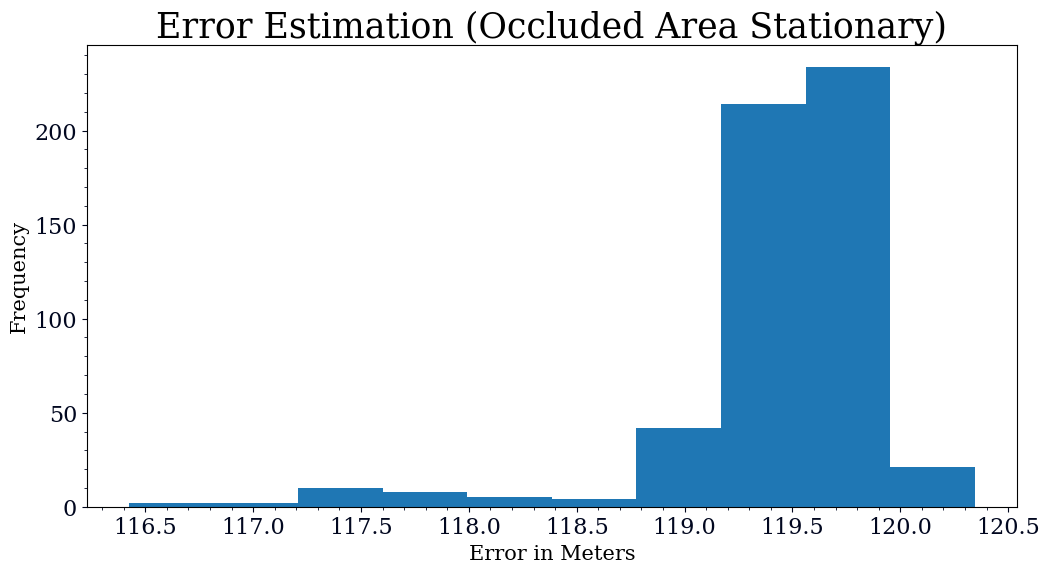

In [18]:
def distanceInKmBetweenEarthCoordinates(a1 , b1, a2, b2):
  return math.sqrt((a1-a2)**2 + (b1-b2)**2)

northing_original = 4686126.5
easting_original = 326315.78125

distance_error = []

for i in range(df_gps.shape[0]):

  answer = distanceInKmBetweenEarthCoordinates(df_gps.UTM_easting[i], df_gps.UTM_northing[i], easting_original, northing_original)

  distance_error.append(answer)

mean = statistics.mean(distance_error)

stdev = statistics.stdev(distance_error)

print("Mean:", mean)
print("Standard deviation:", stdev)

plt.hist(distance_error)
plt.title("Error Estimation (Occluded Area Stationary)", fontsize=25)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Error in Meters", fontsize=15)
plt.show()